
# Import Data
You can simply upload the "archive.zip" file through the file upload section using the Kaggle link.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [2]:
!unzip archive.zip -d data_folder
!rm archive.zip

Archive:  archive.zip
  inflating: data_folder/MELBOURNE_HOUSE_PRICES_LESS.csv  
  inflating: data_folder/Melbourne_housing_FULL.csv  


# Import Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score

# Exploring The Dataset

In [4]:
data = pd.read_csv("/content/data_folder/Melbourne_housing_FULL.csv")

In [5]:
data.iloc[:5, :5]

,Suburb,Address,Rooms,Type,Price
0,Abbotsford,68 Studley St,2,h,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0
3,Abbotsford,18/659 Victoria St,3,u,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
shape = data.shape
num_rows, num_columns = shape
size = data.size

print("Shape (rows, columns):", shape)
print("Number of columns:", num_columns)
print("Size of the dataset:", size)

Shape (rows, columns): (34857, 21)
Number of columns: 21
Size of the dataset: 731997


## Find the duplicated values


In [8]:
data.duplicated().any()

True

In [9]:
data.loc[data.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


## Find the missing values

In [10]:
data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

# Feature Engineering

### Missing Values

---

We can fill in missing values with other values (there are various methods for this) or remove missing data. However, as per the guidelines, we are removing the missing data.

In [11]:
for x in data.columns:
  data[x] = data[x].fillna(data[x].mode().iloc[0])

data.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### Duplicated Values

---



In [12]:
data = data.drop_duplicates(keep='first')

In [13]:
data.duplicated().any()

False

### Outlier Values

---
There are several approaches to handling outlier values. As per the guidelines, I will be using the z-score approach



In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013,0.969947,1.00000,2.0000,3.0000,4.000000e+00,1.600000e+01
Price,34856.0,951901.340659,596854.427685,85000.00000,600000.0000,730000.0000,1.150000e+06,1.120000e+07
Distance,34856.0,11.184809,6.788855,0.00000,6.4000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3116.061195,109.024117,3000.00000,3051.0000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,34856.0,3.064695,0.858102,0.00000,3.0000,3.0000,3.000000e+00,3.000000e+01
Bathroom,34856.0,1.477307,0.686323,0.00000,1.0000,1.0000,2.000000e+00,1.200000e+01
Car,34856.0,1.796735,0.882981,0.00000,1.0000,2.0000,2.000000e+00,2.600000e+01
Landsize,34856.0,392.479659,2777.978408,0.00000,0.0000,218.0000,5.980000e+02,4.330140e+05
BuildingArea,34856.0,135.868070,252.714016,0.00000,120.0000,120.0000,1.200000e+02,4.451500e+04
YearBuilt,34856.0,1967.897722,25.041817,1196.00000,1970.0000,1970.0000,1.970000e+03,2.106000e+03


In [15]:
numerical_columns = data.select_dtypes(include=['number'])

#### Let's determine how much of an outlier it is.


In [16]:
threshold = 3.0
for column in numerical_columns.columns:
    column_data = numerical_columns[column]
    mean = column_data.mean()
    std = column_data.std()

    z_scores = (column_data - mean) / std
    outliers = column_data[abs(z_scores) > threshold]

    num_outliers = len(outliers)
    print(f"Number of Outliers ({column}): {num_outliers}")

Number of Outliers (Rooms): 269
Number of Outliers (Price): 665
Number of Outliers (Distance): 792
Number of Outliers (Postcode): 558
Number of Outliers (Bedroom2): 241
Number of Outliers (Bathroom): 371
Number of Outliers (Car): 353
Number of Outliers (Landsize): 58
Number of Outliers (BuildingArea): 17
Number of Outliers (YearBuilt): 718
Number of Outliers (Lattitude): 514
Number of Outliers (Longtitude): 619
Number of Outliers (Propertycount): 847


#### Outliers treshold using IQR
I decided to examine it with IQR because there were many outliers.

In [17]:
def find_optimal_threshold(s):
    thresholds = {}
    for column in s.columns:
        Q1 = s[column].quantile(0.25)
        Q3 = s[column].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5 * IQR
        thresholds[column] = threshold
    return thresholds

thresholds = find_optimal_threshold(numerical_columns)

for column, threshold in thresholds.items():
    print(f"{column}: {threshold}")

Rooms: 3.0
Price: 825000.0
Distance: 11.399999999999999
Postcode: 157.5
Bedroom2: 0.0
Bathroom: 1.5
Car: 1.5
Landsize: 897.0
BuildingArea: 0.0
YearBuilt: 0.0
Lattitude: 0.11400375000000196
Longtitude: 0.1310137499999655
Propertycount: 9040.5


#### Removing the outliers.
I continue using z-score as required by the guidelines and remove the outliers.

In [18]:
def remove_outliers(data, threshold=3.0):
    numerical_columns = data.select_dtypes(include=['number'])
    data_cleaned = data.copy()

    for column in numerical_columns.columns:
        z_scores = (numerical_columns[column] - numerical_columns[column].mean()) / numerical_columns[column].std()
        is_outlier = np.abs(z_scores) > threshold
        data_cleaned = data_cleaned[~is_outlier]

    return data_cleaned

data_cleaned = remove_outliers(data)

<ipython-input-18-cb4b279afc8c>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned = data_cleaned[~is_outlier]


In [19]:
data = data_cleaned

# Data Visulation

(array([  529., 11262.,  6816.,  4162.,  3321.,  1763.,  1198.,   601.,
          397.,   243.]),
 array([  85000.,  350500.,  616000.,  881500., 1147000., 1412500.,
        1678000., 1943500., 2209000., 2474500., 2740000.]),
 <BarContainer object of 10 artists>)

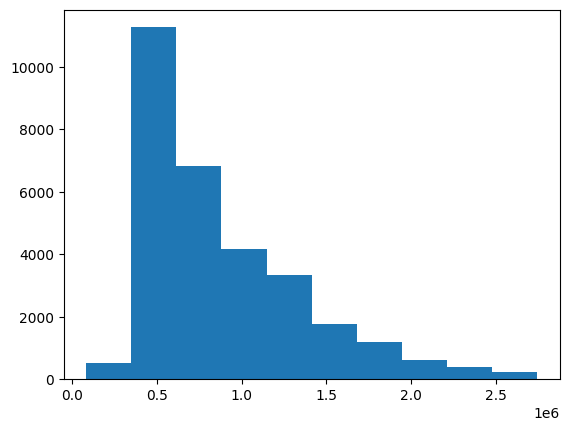

In [20]:
plt.hist(data['Price'])

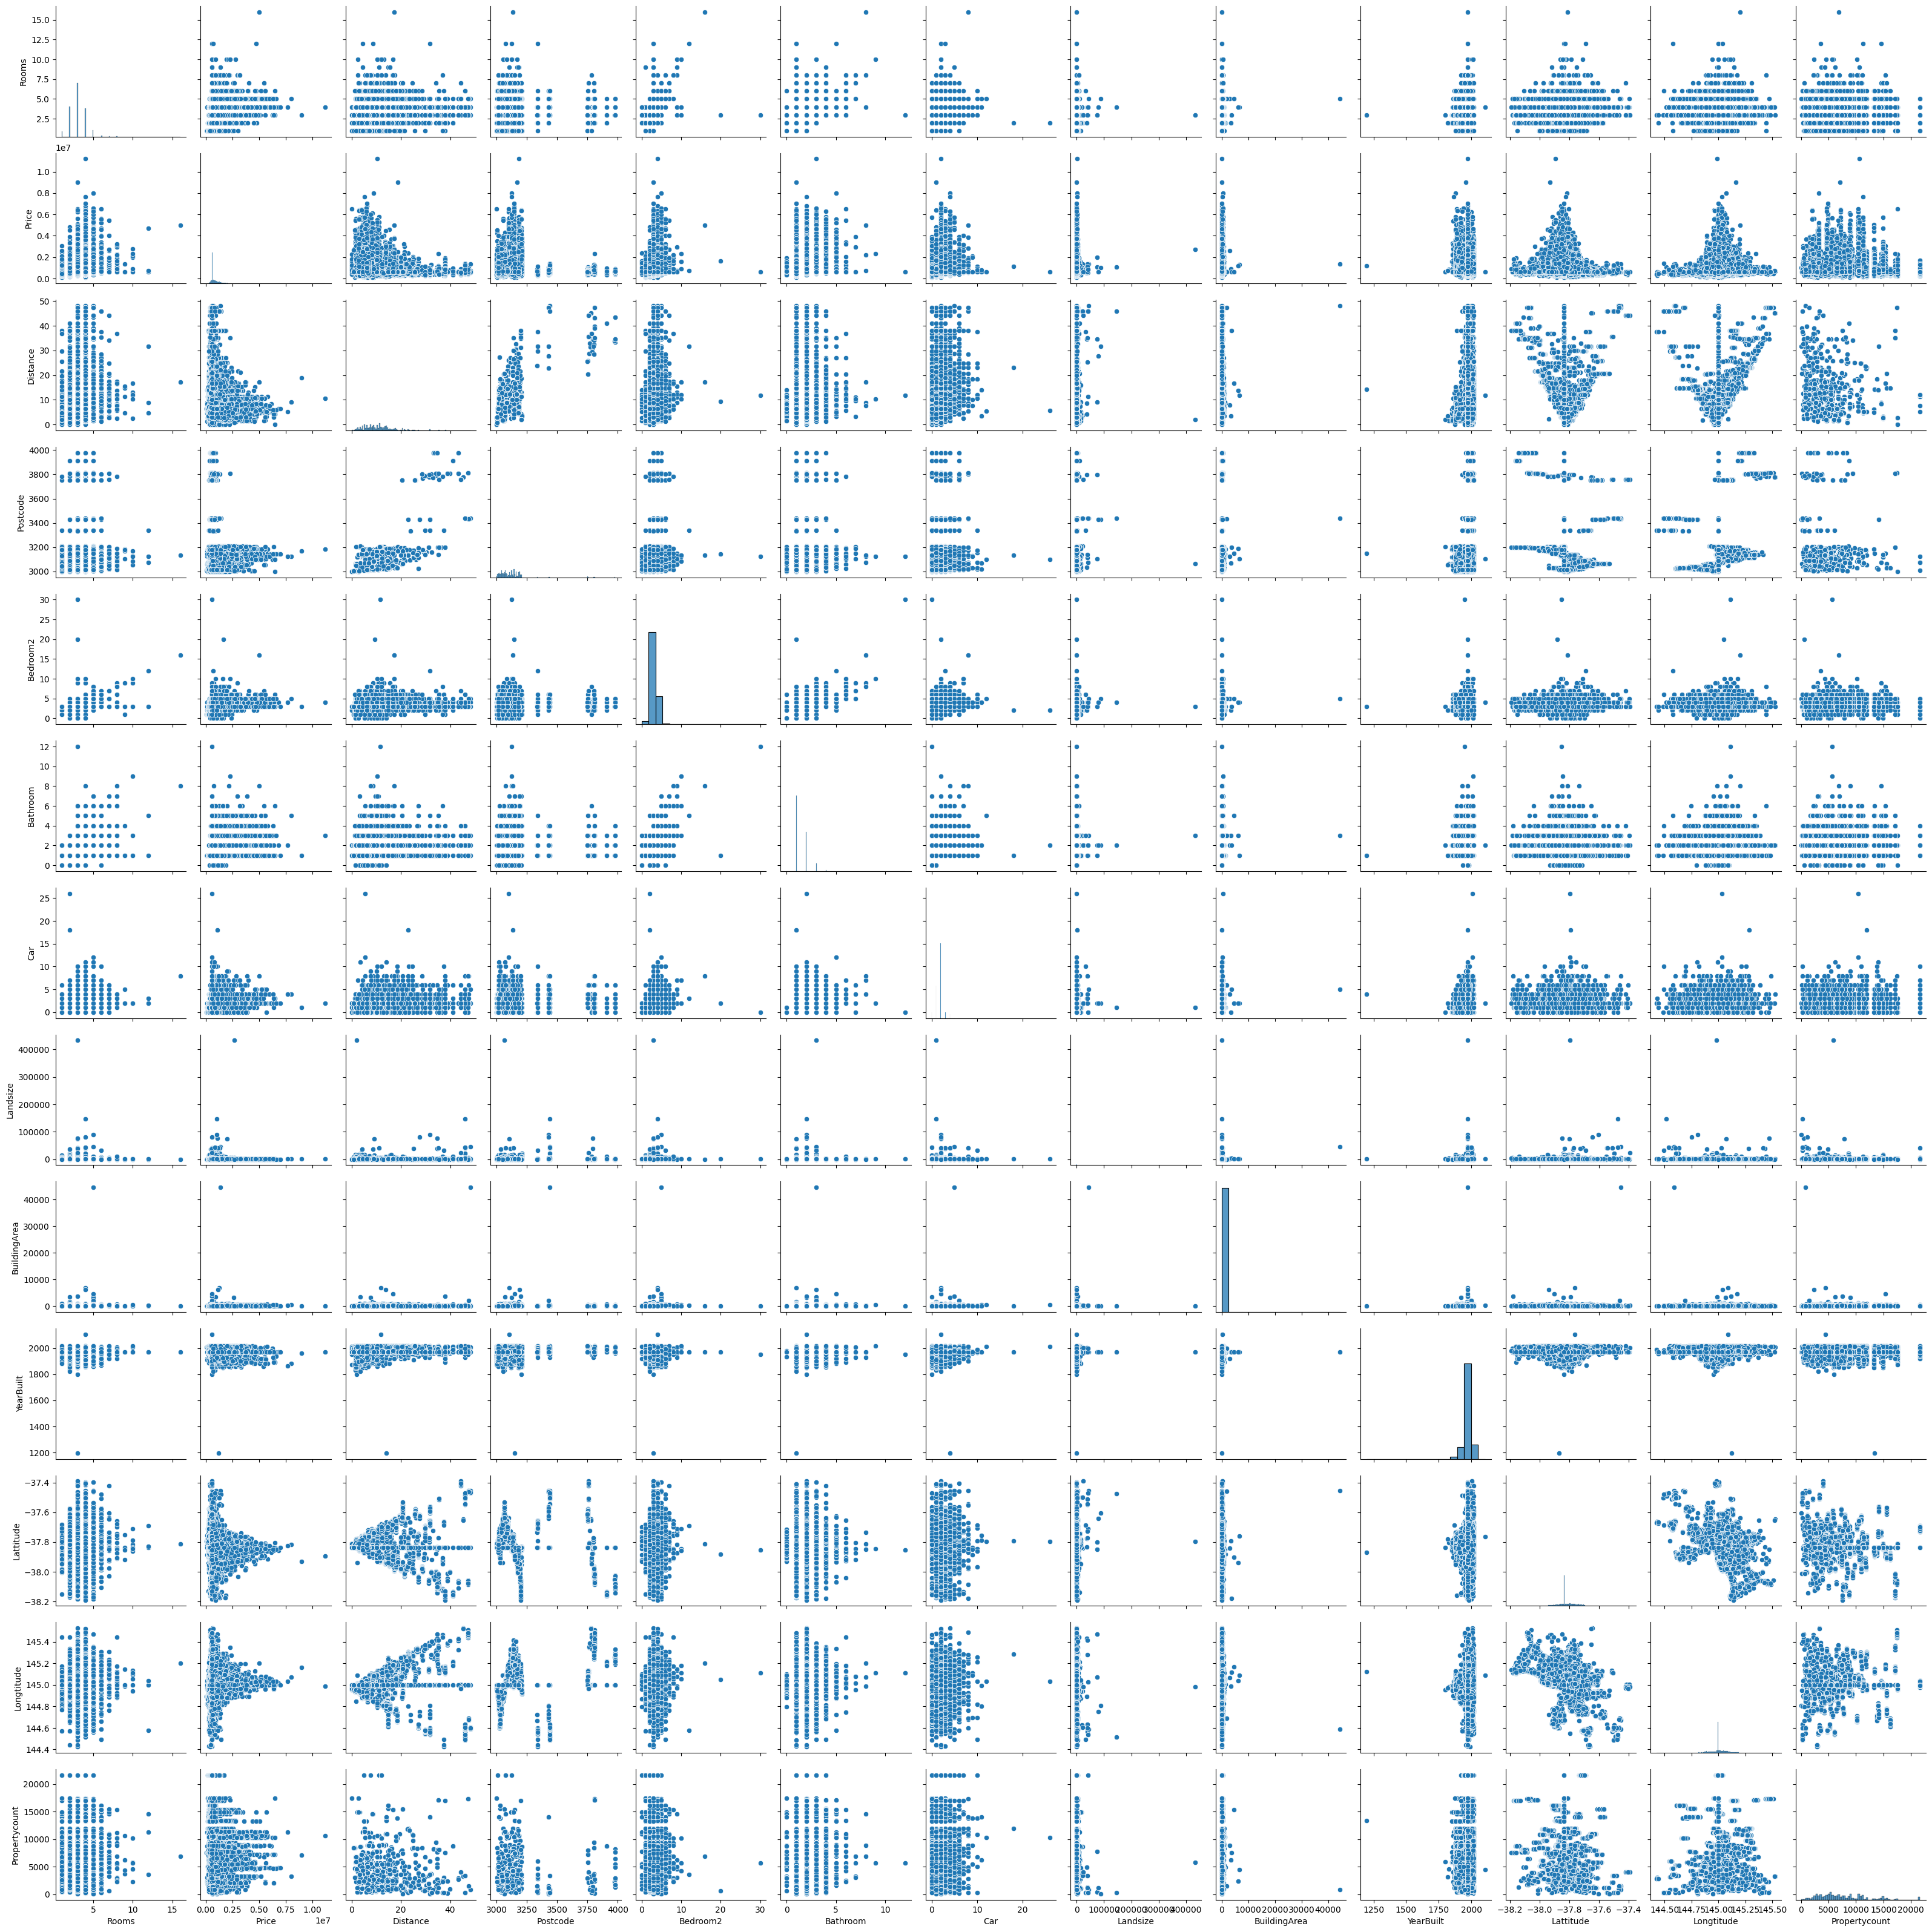

In [21]:
sns.pairplot(numerical_columns)

<ipython-input-22-80c12b1746fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

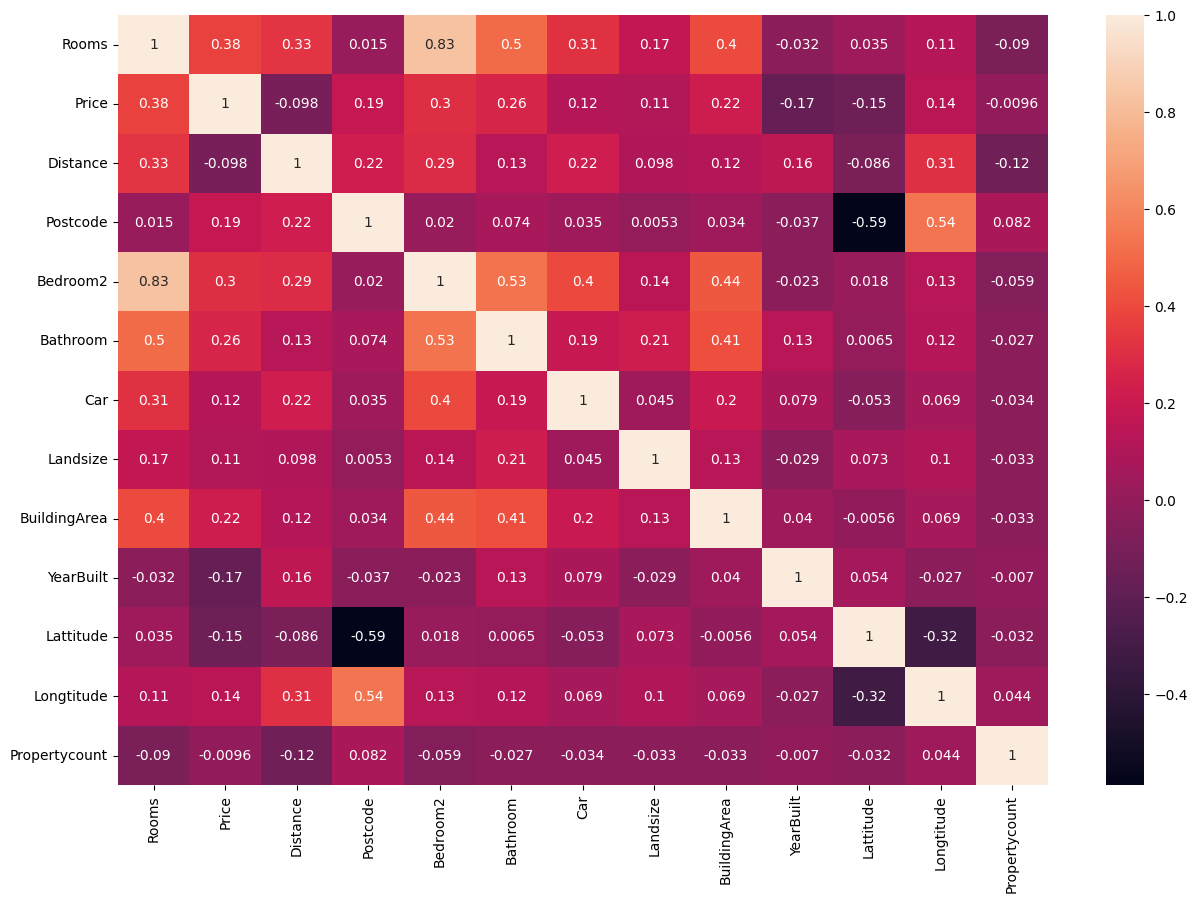

In [22]:
correlation_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True)

In [23]:
# Sort the correlation of 'Price' with other variables.
price_correlations = correlation_matrix['Price'].sort_values(ascending=False)
price_correlations

Price            1.000000
Rooms            0.376336
Bedroom2         0.302517
Bathroom         0.262431
BuildingArea     0.215851
Postcode         0.185842
Longtitude       0.139486
Car              0.120770
Landsize         0.107632
Propertycount   -0.009559
Distance        -0.098299
Lattitude       -0.145527
YearBuilt       -0.169905
Name: Price, dtype: float64

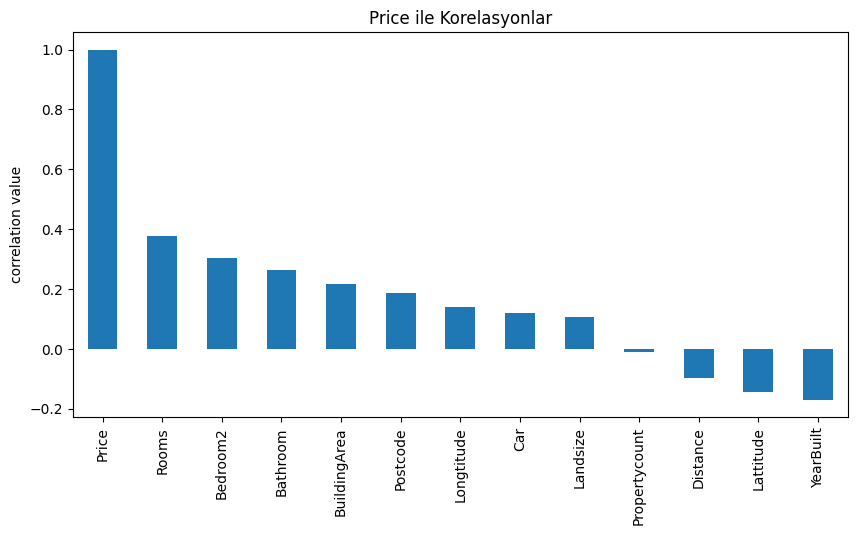

In [24]:
plt.figure(figsize=(10, 5))
price_correlations.plot(kind='bar')
plt.title('Price ile Korelasyonlar')
plt.ylabel('correlation value')
plt.show()

# One Hot Encoder
In this section, for categorical values, we first performed frequency reduction, and then applied one-hot encoding

In [25]:
categorical_columns = data.select_dtypes(include=['object', 'category'])

In [26]:
for columns in categorical_columns:
  cardinality = data[columns].nunique()
  print(f"{columns} Kardinalite: {cardinality}")

Suburb Kardinalite: 287
Address Kardinalite: 29609
Type Kardinalite: 3
Method Kardinalite: 9
SellerG Kardinalite: 347
Date Kardinalite: 78
CouncilArea Kardinalite: 28
Regionname Kardinalite: 8


In [27]:
def transform_low_frequency(df, column, threshold=100):
    value_counts = df[column].value_counts()
    low_frequency = value_counts[value_counts < threshold].index
    df[column] = df[column].apply(lambda x: 'Other' if x in low_frequency else x)
    return df

In [28]:
for columns in categorical_columns:
  data = transform_low_frequency(data, columns)
  data = pd.get_dummies(data, columns=[columns], prefix=[columns], drop_first=True)

# Model Training

In [29]:
y = data['Price']
X = data.drop(columns=['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (21204, 271)
Shape of x_test is (9088, 271)
Shape of y_train is (21204,)
Shape of y_test is (9088,)


In [31]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

for model_name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e+15, tolerance: 4.432e+11
  model = cd_fast.enet_coordinate_descent(


Model: Lasso
Mean Squared Error: 120926929949.0494
R-squared: 0.40912468683754477


Model: LinearRegression
Mean Squared Error: 120933250917.1294
R-squared: 0.4090938012110318


Model: Ridge
Mean Squared Error: 120925040055.75911
R-squared: 0.4091339212677102


Model: ElasticNet
Mean Squared Error: 145718165442.508
R-squared: 0.2879893115985185


Model: KNeighborsRegressor
Mean Squared Error: 155973458543.08582
R-squared: 0.23787971628397775


Model: RandomForestRegressor
Mean Squared Error: 108399209081.81783
R-squared: 0.470337859071026


Model: GradientBoostingRegressor
Mean Squared Error: 114233303303.40677
R-squared: 0.4418312042535004


Model: AdaBoostRegressor
Mean Squared Error: 151127416979.19626
R-squared: 0.26155853065450696


